In [ ]:
import cdflib
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
from pathlib import Path
os.chdir(r'D:\ISRO Hackthon')


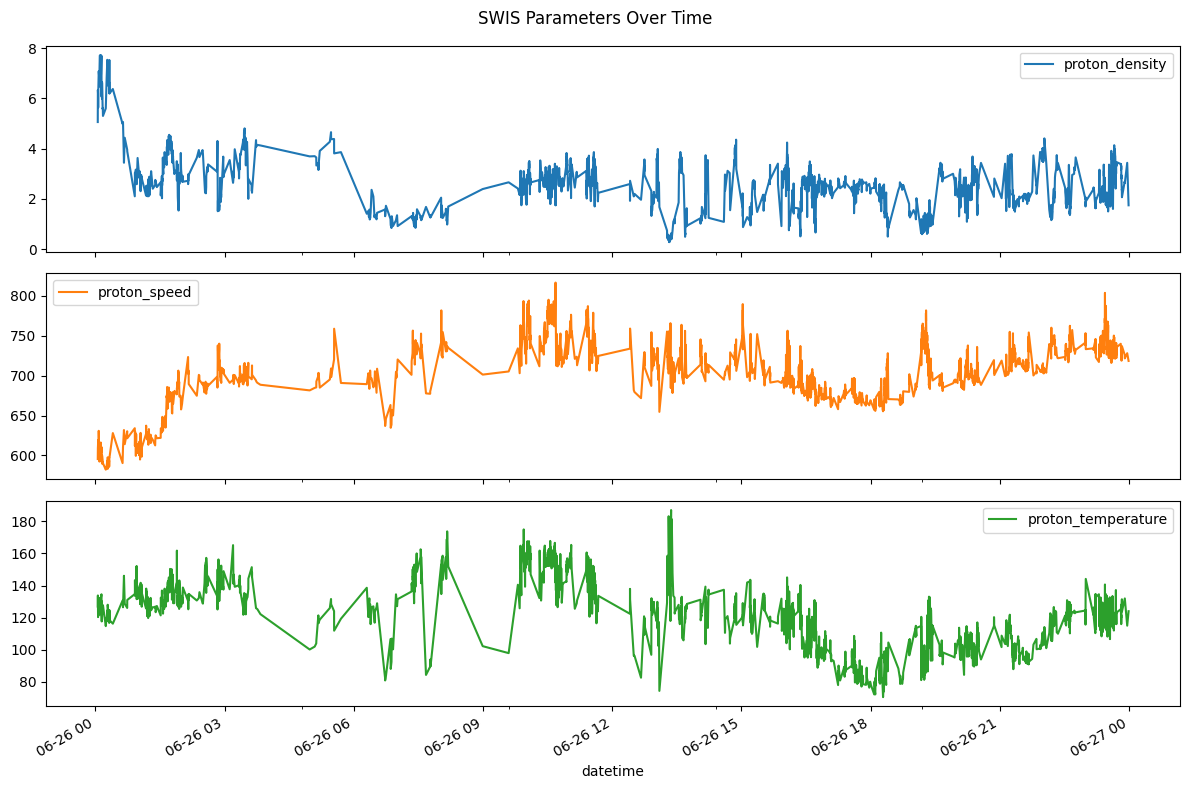

2025-06-26 00:00:26.146000
2025-06-26 00:00:31.146000
2025-06-26 00:00:36.146000
2025-06-26 00:00:41.146000
2025-06-26 00:00:46.146000
2025-06-26 00:00:51.147000
2025-06-26 00:00:56.147000
2025-06-26 00:01:01.147000
2025-06-26 00:01:06.147000
2025-06-26 00:01:11.147000


In [ ]:
data_folder = Path("HaloCMEs/Data")
all_data = []

for file_path in sorted(data_folder.glob("*.cdf")): #Iterates through all the files with CDF extension
    print(f"Reading: {file_path.name}")
    try:
        cdf_file = cdflib.CDF(str(file_path))
        timestamps = cdf_file.varget('epoch_for_cdf_mod') #epoch is a time tagged coordinate
        datetime_vals = cdflib.cdfepoch.to_datetime(timestamps) #converting the epoch to our normal understanding of time
        datetime_python = pd.to_datetime(datetime_vals)#the ddatetime is in numpy64 fomat which is something i have trouble understanding so i am converting it

        proton_density = cdf_file.varget('proton_density')
        proton_speed = cdf_file.varget('proton_bulk_speed')
        proton_temp = cdf_file.varget('proton_thermal')

        #Creating a Data Frame
        df = pd.DataFrame({
            'datetime' : datetime_python,
            'proton_density' : proton_density,
            'proton_speed' : proton_speed,
            'proton_temperature' : proton_temp
        })

        # Drop rows with invalid values (optional)
        df.replace(-1.0e+31, pd.NA, inplace=True)  # CDF missing values sometimes use extreme values
        df.dropna(inplace=True) #Removes the rows which contain missing values
        #CDF files often use a sentinel value (like -1.0e+31) to indicate missing data.
        #This code replaces those values with pd.NA and drops any rows that have missing values, ensuring that only valid data is plotted.
        all_data.append(df)

    except Exception as e:
        print(f"Error Reading {file_path.name}: {e}")

df = pd.concat(all_data).sort_values('datetime')
df.set_index('datetime', inplace = True)

df.plot(subplots=True, figsize = (12, 8), title = "SWIS Parameters Over Time")
plt.tight_layout()
plt.legend()
plt.show()
